<a href="https://colab.research.google.com/github/lucamaral/pos_aprendizado_supervisionado/blob/master/Exerc%C3%ADcio1LucasAmaral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [648]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [649]:
df_cars = pd.read_csv('carros.csv', sep = ',', decimal = '.')
original_size = df_cars.size
print(original_size)

2709


## Análise das variáveis

In [650]:
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,dealer,Manual,0


In [651]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [652]:
def densityChart (col: str): df_cars[col].plot.density()
def boxChart (col: str): df_cars[col].plot.box()
def pieChart (col: str): df_cars[col].value_counts().plot.pie()

### Year

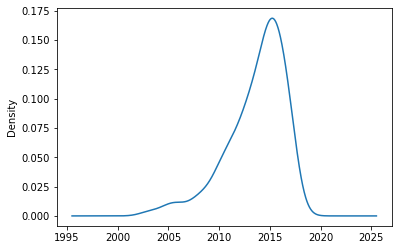

In [653]:
# Verificando densidade da variável Year
densityChart('Year')
# Segue uma distribuição normal

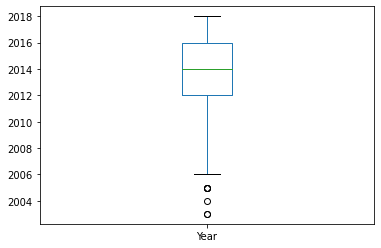

In [654]:
# Verificando se possui outliers na variável Year
boxChart('Year')
# Segundo o boxChart, existem alguns outliers com ano menor que 2006 (aproximado)

### Selling_Price

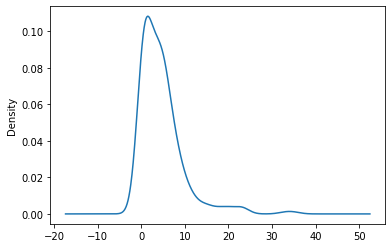

In [655]:
# Verificando densidade da variável Selling_Price
densityChart('Selling_Price')
# Segue uma distribuição normal

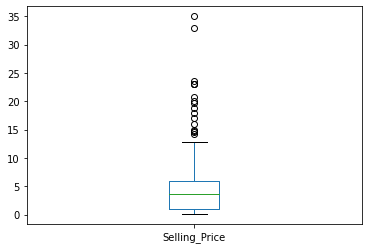

In [656]:
# Verificando se possui outliers Selling_Price
boxChart('Selling_Price')
# Segundo o boxChart, existem alguns outliers com Selling_Price maior que 13 (aproximado)

### Present_Price

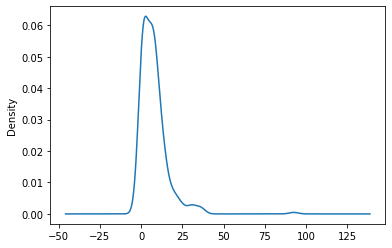

In [657]:
# Verificando densidade da variável Present_Price
densityChart('Present_Price')
# Segue uma distribuição normal

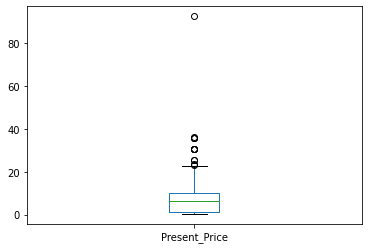

In [658]:
# Verificando se possui outliers Present_Price
boxChart('Present_Price')
# Segundo o boxChart, existem alguns outliers com Present_Price maior que 21 (aproximado)

### Kms_Driven

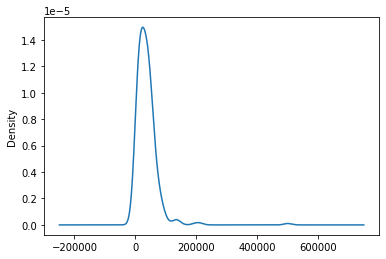

In [659]:
# Verificando densidade da variável Kms_Driven
densityChart('Kms_Driven')
# Segue uma distribuição normal

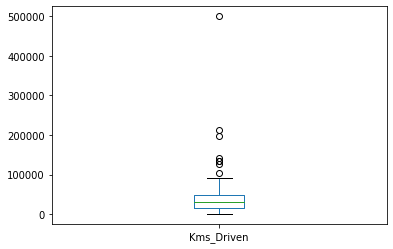

In [660]:
# Verificando se possui outliers Kms_Driven
boxChart('Kms_Driven')
# Segundo o boxChart, existem alguns outliers com Kms_Driven maior que 90.000 (aproximado)

### Fuel_Type

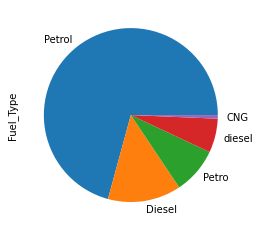

In [661]:
# Verificando os valores do Fuel_Type
pieChart('Fuel_Type')

# Existem valores repetidos, com diferenças na escrita, isso será removido na etapa de limpeza da base

### Seller_Type

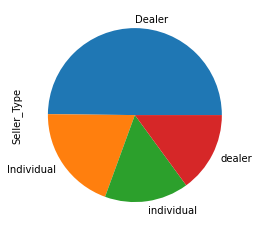

In [662]:
# Verificando valores do Seller_Type
pieChart('Seller_Type')
# Existem valores repetidos, com diferenças na escrita, isso será removido na etapa de limpeza da base

### Transmission

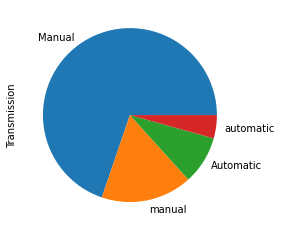

In [663]:
# Verificando valores do Transmission
pieChart('Transmission')
# Existem valores repetidos, com diferenças na escrita, isso será removido na etapa de limpeza da base

### Owner

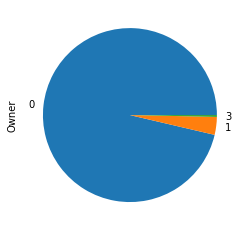

In [664]:
# Verificando valores do Owner
pieChart('Owner')

# Grande maioria não possui dono anterior

## Limpeza da base

### Year

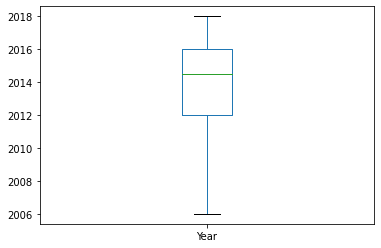

In [665]:
# Removendo linhas onde o ano é menor que 2006
df_cars = df_cars[df_cars.Year >= 2006]
boxChart('Year')

### Selling_Price

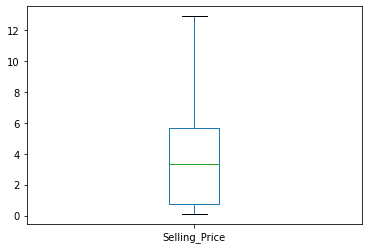

In [666]:
# Removendo linhas onde o Selling_Price é maior que 13
df_cars = df_cars[df_cars.Selling_Price <= 13]
boxChart('Selling_Price')

### Present_Price

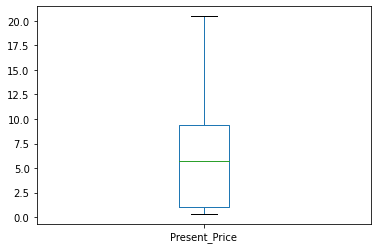

In [667]:
# Removendo linhas onde o Present_Price é maior que 21
df_cars = df_cars[df_cars.Present_Price <= 21]
boxChart('Present_Price')

### Kms_Driven

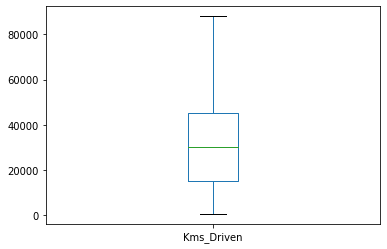

In [668]:
# Removendo linhas onde o Kms_Driven é maior que 90.000
df_cars = df_cars[df_cars.Kms_Driven <= 90000]
boxChart('Kms_Driven')

### Fuel_Type

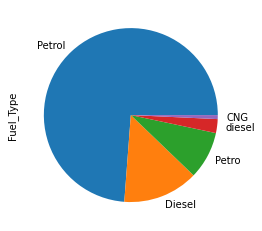

In [669]:
# Ajustando valores
pieChart('Fuel_Type')

# Petro -> Petrol
# diesel -> Diesel

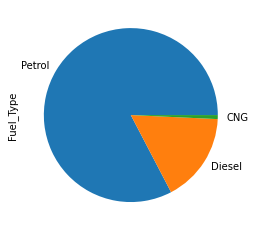

In [670]:
def clean_fuel_type(x: str) -> str:
    if x == 'Petro':
        return 'Petrol'
    elif x == 'diesel':
        return 'Diesel'
    else:
        return x

df_cars.Fuel_Type = df_cars.Fuel_Type.apply(clean_fuel_type)

pieChart('Fuel_Type')

### Seller_Type

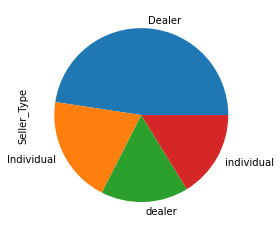

In [671]:
# Ajustando valores

pieChart('Seller_Type')

# individual -> Individual
# dealer -> Dealer

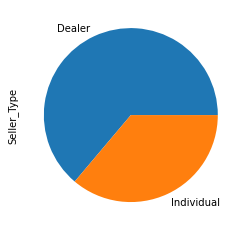

In [672]:
def clean_seller_type(x: str) -> str:
    if x == 'individual':
        return 'Individual'
    elif x == 'dealer':
        return 'Dealer'
    else:
        return x

df_cars.Seller_Type = df_cars.Seller_Type.apply(clean_seller_type)

pieChart('Seller_Type')

### Transmission

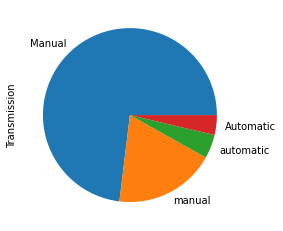

In [673]:
# Ajustando valores

pieChart('Transmission')

# manual -> Manual
# automatic -> Automatic

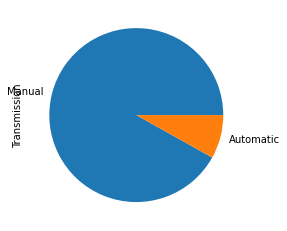

In [674]:
def clean_transmission(x: str) -> str:
    if x == 'manual':
        return 'Manual'
    elif x == 'automatic':
        return 'Automatic'
    else:
        return x

df_cars.Transmission = df_cars.Transmission.apply(clean_transmission)

pieChart('Transmission')

### Linhas removidas

In [675]:
print(original_size)
print(df_cars.size)
print(original_size - df_cars.size)

2709
2439
270


## Discretização e normalização

In [676]:
from sklearn.preprocessing import KBinsDiscretizer

### Year

In [677]:
# Discretizando Year
# Criando 5 grupos


discretizer = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'quantile')
df_cars = df_cars.assign(Year_Discretized = discretizer.fit_transform(df_cars.Year.values.reshape(-1, 1)))

### Kms_Driven

In [678]:
# Discretizando Kms_Driven
# Criando 5 grupos

discretizer = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'quantile')
df_cars = df_cars.assign(Kms_Driven_Discretized = discretizer.fit_transform(df_cars.Kms_Driven.values.reshape(-1, 1)))

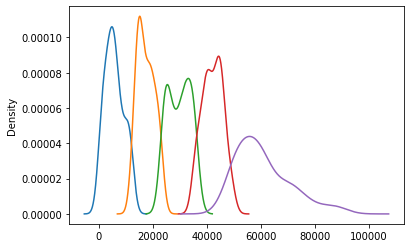

In [679]:
[ df_cars[df_cars.Kms_Driven_Discretized == i].Kms_Driven.plot.density() for i in range(5) ]

### Fuel_Type

In [680]:
# Gerando uma variável para cada Fuel_Type, para verificar correlação

new_fuel_type_values = pd.get_dummies(df_cars['Fuel_Type'])
df_cars = pd.concat([df_cars, new_fuel_type_values], axis = 1)
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Discretized,Kms_Driven_Discretized,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.0,2.0,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1.0,3.0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4.0,0.0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.0,0.0,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.0,3.0,0,1,0


### Seller_Type

In [681]:
# Gerando uma variável para cada Seller_Type, para verificar correlação

new_seller_type_values = pd.get_dummies(df_cars['Seller_Type'])
df_cars = pd.concat([df_cars, new_seller_type_values], axis = 1)
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Discretized,Kms_Driven_Discretized,CNG,Diesel,Petrol,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.0,2.0,0,0,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1.0,3.0,0,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4.0,0.0,0,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.0,0.0,0,0,1,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.0,3.0,0,1,0,1,0


### Transmission

In [682]:
# Gerando uma variável para cada Transmission, para verificar correlação

new_transmission_values = pd.get_dummies(df_cars['Transmission'])
df_cars = pd.concat([df_cars, new_transmission_values], axis = 1)
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Discretized,Kms_Driven_Discretized,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.0,2.0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1.0,3.0,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4.0,0.0,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.0,0.0,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.0,3.0,0,1,0,1,0,0,1


### Owner

In [683]:
# Transformar valores em Novo/Usado

df_cars.Owner = df_cars.Owner.apply(lambda x: 'New' if x == 0 else 'Used')
df_cars.Owner.value_counts()

New     261
Used     10
Name: Owner, dtype: int64

In [684]:
# Gerando uma variável para cada Owner, para verificar correlação

new_owner_values = pd.get_dummies(df_cars['Owner'])
df_cars = pd.concat([df_cars, new_owner_values], axis = 1)
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Discretized,Kms_Driven_Discretized,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual,New,Used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,New,2.0,2.0,0,0,1,1,0,0,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,New,1.0,3.0,0,1,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,New,4.0,0.0,0,0,1,1,0,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,New,0.0,0.0,0,0,1,1,0,0,1,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,New,2.0,3.0,0,1,0,1,0,0,1,1,0


## Verificando correlações

In [685]:
df_cars.corr()

# Analisando as correlações, as variáveis que mais influenciam o Selling_Price são:
# Present_Price, Dealer, Individual, Diesel, Petrol, Year_Discretized, Kms_Driven_Discretized, New, Used

,Year,Selling_Price,Present_Price,Kms_Driven,Year_Discretized,Kms_Driven_Discretized,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual,New,Used
Year,1.000000,0.260426,-0.041684,-0.533589,0.941063,-0.524367,-0.032835,0.024012,-0.016177,-0.026581,0.026581,0.049853,-0.049853,0.155991,-0.155991
Selling_Price,0.260426,1.000000,0.868992,0.194506,0.252974,0.199488,-0.019411,0.466247,-0.453863,0.753963,-0.753963,0.051987,-0.051987,0.116050,-0.116050
Present_Price,-0.041684,0.868992,1.000000,0.434093,-0.051473,0.426916,0.007476,0.394258,-0.389186,0.777677,-0.777677,0.021310,-0.021310,0.109832,-0.109832
Kms_Driven,-0.533589,0.194506,0.434093,1.000000,-0.536925,0.957286,0.049377,0.335414,-0.340824,0.413932,-0.413932,-0.110915,0.110915,0.000964,-0.000964
Year_Discretized,0.941063,0.252974,-0.051473,-0.536925,1.000000,-0.525400,-0.044120,-0.003077,0.012997,-0.041910,0.041910,0.067780,-0.067780,0.126699,-0.126699
Kms_Driven_Discretized,-0.524367,0.199488,0.426916,0.957286,-0.525400,1.000000,0.060411,0.319626,-0.327801,0.421314,-0.421314,-0.087375,0.087375,-0.012796,0.012796
CNG,-0.032835,-0.019411,0.007476,0.049377,-0.044120,0.060411,1.000000,-0.038476,-0.188241,0.064898,-0.064898,-0.025630,0.025630,0.016878,-0.016878
Diesel,0.024012,0.466247,0.394258,0.335414,-0.003077,0.319626,-0.038476,1.000000,-0.974153,0.335847,-0.335847,-0.132637,0.132637,0.034743,-0.034743
Petrol,-0.016177,-0.453863,-0.389186,-0.340824,0.012997,-0.327801,-0.188241,-0.974153,1.000000,-0.344758,0.344758,0.136156,-0.136156,-0.037963,0.037963
Dealer,-0.026581,0.753963,0.777677,0.413932,-0.041910,0.421314,0.064898,0.335847,-0.344758,1.000000,-1.000000,-0.001245,0.001245,0.097113,-0.097113


## Criando modelo

In [686]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [687]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def build_models(alg):
    model = None
    if alg == 'linear_regression':
        model = LinearRegression()
    elif alg == 'lasso_regression':
        model = GridSearchCV(
            Lasso(normalize=True),
            param_grid={
                'alpha': np.linspace(0, 5, num=50)
            },
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            cv=KFold(n_splits=10, shuffle=True)
        )
    elif alg == 'ridge_regression':
        model = GridSearchCV(
            Ridge(normalize=True),
            param_grid={
                'alpha': np.linspace(0, 5, num=50)
            },
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            cv=KFold(n_splits=10, shuffle=True)
        )
    elif alg == 'regression_tree':
        model = GridSearchCV(
            DecisionTreeRegressor(),
            param_grid={
                'criterion': ['mae', 'mse'],
                'max_depth': [None, 2, 4, 8],
                'min_samples_split': [2, 4, 8]
            },
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            cv=KFold(n_splits=10, shuffle=True)
        )
    elif alg == 'random_forest':
        model = GridSearchCV(
            RandomForestRegressor(n_estimators=50, n_jobs=-1),
            param_grid={
                'criterion': ['mae', 'mse'],
                'max_depth': [None, 2, 4, 8],
                'min_samples_split': [2, 4, 8]
            },
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            cv=KFold(n_splits=10, shuffle=True)
        )
    elif alg == 'knn':
        model = GridSearchCV(
            KNeighborsRegressor(n_jobs=-1),
            param_grid={
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
            },
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            cv=KFold(n_splits=10, shuffle=True)
        )
    else:
        raise Exception('Modelo não implementado.')
    
    return model

In [688]:
# De acordo com as correlações
# Present_Price, Dealer, Individual, Diesel, Petrol, Year_Discretized, Kms_Driven_Discretized, New, Used

def build_features(df_train, df_test):
    ohe_smoker_bmi = OneHotEncoder(sparse=False)
    x_train_ohe = ohe_smoker_bmi.fit_transform(df_train[['Seller_Type', 'Fuel_Type', 'Owner']])
    x_test_ohe = ohe_smoker_bmi.transform(df_test[['Seller_Type', 'Fuel_Type', 'Owner']])

    mms = MinMaxScaler()
    x_train_quant = mms.fit_transform(df_train[['Present_Price', 'Year_Discretized', 'Kms_Driven_Discretized']])
    x_test_quant = mms.transform(df_test[['Present_Price', 'Year_Discretized', 'Kms_Driven_Discretized']])
   
    x_train = np.hstack([x_train_ohe, x_train_quant])
    x_test = np.hstack([x_test_ohe, x_test_quant])

    y_train = df_train.Selling_Price.values.reshape(-1, 1)
    y_test = df_test.Selling_Price.values.reshape(-1, 1)

    return x_train, y_train, x_test, y_test

In [689]:
k = 10
algs = ['linear_regression', 'lasso_regression', 'ridge_regression', 'regression_tree', 'random_forest', 'knn']
mean_r2 = np.zeros(shape=(len(algs), k, 2))
mean_mae = np.zeros(shape=(len(algs), k, 2))
for alg_index, alg in enumerate(algs):
    cv = KFold(n_splits=k, shuffle=True)
    for fold, (train, test) in enumerate(cv.split(df_cars)):
        df_train = df_cars.iloc[train]
        df_test = df_cars.iloc[test]

        # computar as features
        x_train, y_train, x_test, y_test = build_features(df_train, df_test)
        
        # treinar o modelo
        model = build_models(alg)
        model.fit(x_train, y_train)
        
        # coletar os resultados
        y_pred_train = model.predict(x_train)
        mean_mae[alg_index, fold, 0] = mean_absolute_error(y_train, y_pred_train)
        mean_r2[alg_index, fold, 0] = r2_score(y_train, y_pred_train)

        y_pred_test = model.predict(x_test)
        mean_mae[alg_index, fold, 1] = mean_absolute_error(y_test, y_pred_test)
        mean_r2[alg_index, fold, 1] = r2_score(y_test, y_pred_test)

    # apresentar os resultados
    print('-' * 50)
    print('Algoritmo:', alg)
    print('-' * 50)
    print('Treino - Média MAE: ', mean_mae[alg_index, :,0].mean())
    print('Teste - Média MAE: ', mean_mae[alg_index, :,1].mean())
    print('-' * 50)
    print('Treino - Média R2: ', mean_r2[alg_index, :,0].mean())
    print('Teste - Média R2: ', mean_r2[alg_index, :,1].mean())
    print()

--------------------------------------------------
Algoritmo: linear_regression
--------------------------------------------------
Treino - Média MAE:  0.806173699989618
Teste - Média MAE:  0.8347051466738611
--------------------------------------------------
Treino - Média R2:  0.8824439402066915
Teste - Média R2:  0.8634261332240325



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.9488807703671, tolerance: 0.23300048666666667
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages

--------------------------------------------------
Algoritmo: lasso_regression
--------------------------------------------------
Treino - Média MAE:  0.8057862678626219
Teste - Média MAE:  0.8373735964241964
--------------------------------------------------
Treino - Média R2:  0.8825566723238749
Teste - Média R2:  0.8635812565646936

--------------------------------------------------
Algoritmo: ridge_regression
--------------------------------------------------
Treino - Média MAE:  0.8050485700516576
Teste - Média MAE:  0.856919767242793
--------------------------------------------------
Treino - Média R2:  0.8821529738865245
Teste - Média R2:  0.8593932557443505

--------------------------------------------------
Algoritmo: regression_tree
--------------------------------------------------
Treino - Média MAE:  0.22257008350551155
Teste - Média MAE:  0.6061242945326277
--------------------------------------------------
Treino - Média R2:  0.9817177291831036
Teste - Média R2:  0.89759

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expect

--------------------------------------------------
Algoritmo: random_forest
--------------------------------------------------
Treino - Média MAE:  0.21629522610995436
Teste - Média MAE:  0.4754589018208885
--------------------------------------------------
Treino - Média R2:  0.9879307990793867
Teste - Média R2:  0.9431595936252121

--------------------------------------------------
Algoritmo: knn
--------------------------------------------------
Treino - Média MAE:  0.04022686028469271
Teste - Média MAE:  0.6262934821835963
--------------------------------------------------
Treino - Média R2:  0.9981034633513406
Teste - Média R2:  0.8828111888723397



In [690]:
# A regressão Ridge teve bons resultados, vou utilizar ela para criar o modelo de produção

x_train, y_train, x_test, y_test = build_features(df_cars, df_cars)

# treinar o modelo
model = build_models('ridge_regression')
model.fit(x_train, y_train)

# executamos para obter a melhor parametrização para o modelo
model.best_params_

{'alpha': 0.0}

In [691]:
x_complete, y_complete, _, _ = build_features(df_cars, df_cars)

# treinar o modelo com a melhor parametrização encontrada
model = Ridge(normalize=True, alpha= 0)

model.fit(x_complete, y_complete)

model

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

### Validação Cruzada

In [692]:
cv = KFold(n_splits=10, shuffle=True)

predicted = list()
ground_truth = list()

for fold, (train, test) in enumerate(cv.split(df_cars)):
    df_train = df_cars.iloc[train]
    df_test = df_cars.iloc[test]

    x_train, y_train, x_test, y_test = build_features(df_train, df_test)

    model = build_models('ridge_regression')
    model.fit(x_train, y_train)

    predicted.extend(model.predict(x_test))
    ground_truth.extend(y_test)

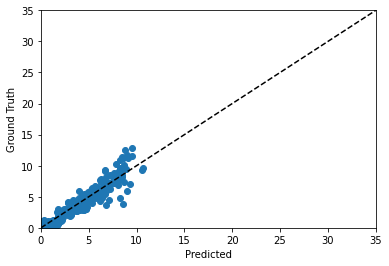

In [693]:
fig, ax = plt.subplots()
ax.plot([0, 35], [0, 35], 'k--')
ax.scatter(x = predicted, y = ground_truth)
ax.set_xlim([0, 35])
ax.set_ylim([0, 35])
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground Truth')
plt.show()

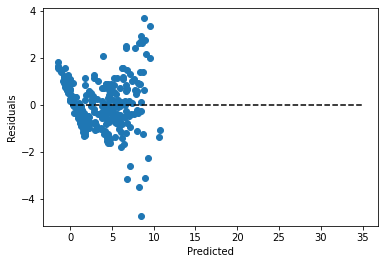

In [694]:
fig, ax = plt.subplots()
residuals = [ ground_truth[i] - predicted[i] for i in range(len(predicted)) ]
ax.scatter(x = predicted, y = residuals)
ax.plot([0, 35], [0, 0], 'k--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()